In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Read the dataset
def read_data(file):
    with open(file, 'r') as f:
        lines = f.readlines()

    max_index = 0
    for line in lines:
        parts = line.strip().split()
        for part in parts[1:]:
            index, _ = part.split(':')
            max_index = max(max_index, int(index))
    labels, features = [], []
    for line in lines:
        parts = line.strip().split()
        labels.append(int(parts[0]))
        feature_vector = np.zeros(max_index)
        for part in parts[1:]:
            index, value = part.split(':')
            feature_vector[int(index) - 1] = float(value)
        features.append(feature_vector)

    return np.array(labels), np.array(features)

labels, features = read_data('diabetes.txt')
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

# Convert labels for sigmoid activation function
Y_train = (Y_train + 1) // 2
Y_test = (Y_test + 1) // 2

# the MLP model
model = Sequential()
model.add(Dense(48, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_train, Y_train)
print(f'Accuracy {accuracy*100:.2f}%')
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/200
18/18 [==============================] - 2s 19ms/step - loss: 0.6204 - accuracy: 0.6632 - val_loss: 0.6144 - val_accuracy: 0.6406
Epoch 2/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5774 - accuracy: 0.6823 - val_loss: 0.5909 - val_accuracy: 0.6667
Epoch 3/200
18/18 [==============================] - 0s 6ms/step - loss: 0.5468 - accuracy: 0.7101 - val_loss: 0.5712 - val_accuracy: 0.6979
Epoch 4/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5179 - accuracy: 0.7274 - val_loss: 0.5534 - val_accuracy: 0.7188
Epoch 5/200
18/18 [==============================] - 0s 6ms/step - loss: 0.4946 - accuracy: 0.7622 - val_loss: 0.5425 - val_accuracy: 0.7135
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4771 - accuracy: 0.7760 - val_loss: 0.5347 - val_accuracy: 0.7188
Epoch 7/200
18/18 [==============================] - 0s 6ms/step - loss: 0.4665 - accuracy: 0.7708 - val_loss: 0.5279 - val_accuracy: 0.7344
Epoch 8/200


6/6 [==============================] - 0s 2ms/step


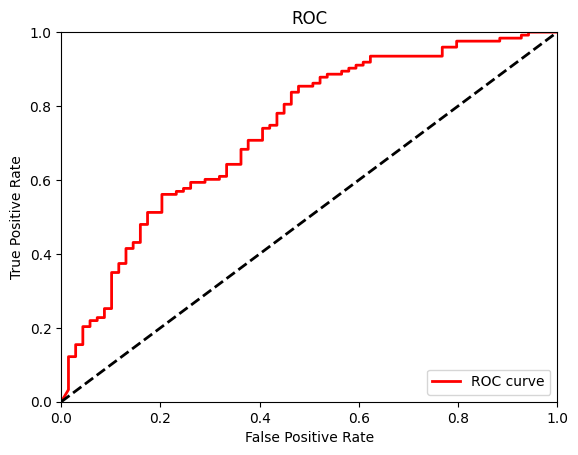

              precision    recall  f1-score   support

           0       0.56      0.58      0.57        69
           1       0.76      0.74      0.75       123

    accuracy                           0.68       192
   macro avg       0.66      0.66      0.66       192
weighted avg       0.69      0.68      0.68       192



In [22]:
import numpy as np
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities
y_pred = model.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# Classification
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(Y_test, y_pred))

